# # Youtube Dataset Analysis

In [ ]:
# importing all the basic libraries for the project

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')


In [73]:
# importing data from the respective Directries:
comment = pd.read_csv(r'D:\Youtube_Viewers_Sentiments_Analysis\Data\UScomments.csv',on_bad_lines='skip')

In [74]:
comment.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [75]:
# checking if the database contains and Null values
comment.isnull().sum()

video_id         0
comment_text    26
likes            0
replies          0
dtype: int64

comment.dropna(inplace=True)

In [76]:
# dropping the null values
comment.dropna(inplace=True)

In [77]:
comment.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

In [78]:
# installing textblob libraries to find the polarity 
# ! pip install textblob

In [79]:
from textblob import TextBlob

In [80]:
# itreating through the database using for loop to append polarity in list
polarity = []
for text in comment['comment_text']:
    try:
        polarity.append(TextBlob(text).sentiment.polarity)
    except:
        polarity.append(0)

In [81]:
len(polarity)

691374

In [82]:
# adding polarity in the database to find the positive and negative.if polarity=1-positive comments and vice versa
comment['polarity']=polarity

In [83]:
comment.sample(5)

,video_id,comment_text,likes,replies,polarity
3142,JO7X9ZPoAp8,People in the comment section seriously just m...,0,0,-0.52381
156658,OZAfse9Pb4c,best,0,0,1.00000
564848,YCYXUi_5kns,This channel is awesome!,0,0,1.00000
321647,2DTwXdqmRiM,does anybody remember that snl skit where Chri...,0,0,0.00000
311416,SNGWh_-R1VE,Finally a game where they focus on the villain...,1,0,0.21000


In [84]:
# filtering data in postive and negative comments
filter1 = comment['polarity']==1
positive_comment=comment[filter1]
positive_comment

,video_id,comment_text,likes,replies,polarity
64,XpVt6Z1Gjjo,yu are the best,1,0,1.0
156,cLdxuaxaQwc,Power is the disease. Care is the cure. Keep...,0,0,1.0
227,WYYvHb03Eog,YAS Can't wait to get it! I just need to sell ...,0,0,1.0
307,sjlHnJvXdQs,This is priceless,0,0,1.0
319,sjlHnJvXdQs,Summed up perfectly,0,0,1.0
...,...,...,...,...,...
691373,EoejGgUNmVU,Perfect. Every version,0,0,1.0
691383,EoejGgUNmVU,Me encantaaaaa <3,0,0,1.0
691388,EoejGgUNmVU,Best song ever 🤘,0,0,1.0
691389,EoejGgUNmVU,excellent performance,0,0,1.0


In [85]:
filter2 = comment['polarity']==-1
negative_comment=comment[filter2]
negative_comment

,video_id,comment_text,likes,replies,polarity
512,8wNr-NQImFg,BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...,0,0,-1.0
562,8wNr-NQImFg,Well… The brain surgeon Ben Carson just proved...,0,0,-1.0
952,Ayb_2qbZHm4,WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!,0,0,-1.0
1371,vu_9muoxT50,WTF BRUH!!!!!!,0,0,-1.0
1391,vu_9muoxT50,cheeseus christ thats insane!!!,0,0,-1.0
...,...,...,...,...,...
690788,Hlt3rA-oDao,Like Kelly she evil,0,0,-1.0
690865,Ni5Uc-DdMqk,R U FUCKING KIDDING ME?!?!?!?!,11,1,-1.0
691073,4kmSATD25iY,This is horribly offensive please report,0,0,-1.0
691180,xlu6i6lT_vk,Sink holes looks terrifying sinkholes sink you...,0,0,-1.0


In [ ]:
# installing wordcloud to plot the graph to visualize the most used positive and negative words in comments
# !pip install wordcloud

In [87]:
from wordcloud import WordCloud,STOPWORDS

In [88]:
# list of connecting words, which as no meaning
set(STOPWORDS)

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [89]:
comment['comment_text']

0                         Logan Paul it's yo big day ‼️‼️‼️
1         I've been following you from the start of your...
2                        Say hi to Kong and maverick for me
3                                       MY FAN . attendance
4                                                trending 😉
                                ...                        
691395                                               Лучшая
691396    qu'est ce que j'aimerais que tu viennes à Roan...
691397                            Ven a mexico! 😍 te amo LP
691398                                      Islığı yeter...
691399    Kocham tą piosenkę😍❤❤❤byłam zakochana po uszy ...
Name: comment_text, Length: 691374, dtype: object

In [90]:
x = ' '.join(positive_comment['comment_text'])
x

"yu are the best Power is the disease.\xa0 Care is the cure.\xa0 Keep caring for yourself and others as best as you can.\xa0 This is life. YAS Can't wait to get it! I just need to sell my kidney so I can afford iPhone X :D This is priceless Summed up perfectly This is awesome. 1:20 XDDDDDDDDD BEST MOVIE EVER!!! Power is the disease.\xa0 Care is the cure.\xa0 Keep caring for yourself and others as best as you can.\xa0 This is life. The greatest movie about the greatest movie. It's Harry guys he's Spiderman best friend Best remake ever! Great review! awesome vlog Subscribe to me if Roman Atwood is the best youtuber I was attacked by a police dog once, \\n\\n\\n\\n\\n\\nthat was the best use of peanut butter ever. The best part of the movie was the credits DO THE ORIGINAL STEPHEN KING'S IT!!!!!!!!!!!!!! 🤣🤣🤣🤣😃😃😃😃 i downloaded and saw The Mummy 2017  in the best quality guys. here's the Iink https://twitter.com/akewdiudri/status/907980087676477442\\nyou must see too guys! that was awesome. 

In [91]:
y = ' '.join(negative_comment['comment_text'])
y

"BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE HE EXPOSED HITLARY'S RITUAL ABUSE ON CHILDREN!!!!!!! Well… The brain surgeon Ben Carson just proved how truly insane he is… WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!! WTF BRUH!!!!!! cheeseus christ thats insane!!! this is the worst thing i've heard. ever. Economy is horrible in Cuba. It's going to be years before they get out of this. Sub to me if this is terrible PATHETIC I don't like this sportscaster  sounds very annoying commentators are awful This tv show became trump witch hunt tube... and frankly, boring. Arpaio should be arrested again for horribly butchering that song. This  show has become one-noted and pathetic. HARD CANDY!!!!!!!!!!! Tired of the philosophy add !!!!!!! boring 0:22   **laughs at terrible pun** Why is media even covering this disgusting woman anymore? How is this trending ? Awful a horrible attempt to try and get us to freak out this is one of the worst videos I've ever seen Whats with the horrible music? tf She 

In [92]:
wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(x)

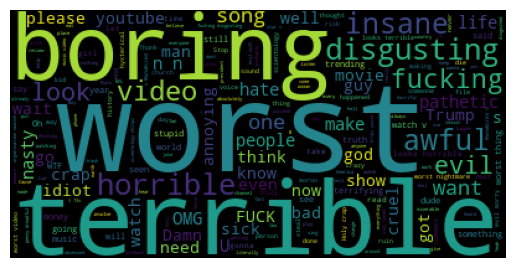

In [168]:
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('Positive_word.png')

In [94]:
z='''    Collaborate with cross-functional teams to identify and prioritise new avenues for growth opportunities, including areas of - workflow, innovation, outreach, and strategic planning.
    Craft strategic initiatives, identify process improvement opportunities measure the impact, and improve user experience.
    Deep dive and acquire an extensive knowledge of emerging industry practices.
    Mentor data analysts in creating the most optimised SQL queries, and scripts for faster execution and results.Requirements3-5 years of product /e-commerce industry experience in the data space.
    Bachelor/ Master's Degree in Engineering.
    Strong SQL skills.
    Strong knowledge of Python/R for analytics and hypothesis testing.
    Ability to own and drive analysis and projects end-to-end.
    Basics of Statistics, Hypothesis testing, and ML algorithms (Regression analysis and Clustering algorithms).
    Convey Data Stories through Visualisation (Tableau, Power BI, and QlikView).
    Experience in technical requirements gathering and the ability to document technical requirements is a strong plus.'''

In [95]:
wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(z)

(-0.5, 399.5, 199.5, -0.5)

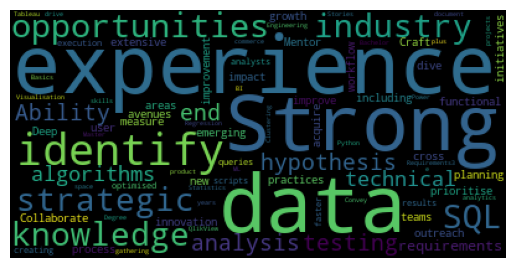

In [96]:
plt.imshow(wordcloud)
plt.axis('off')

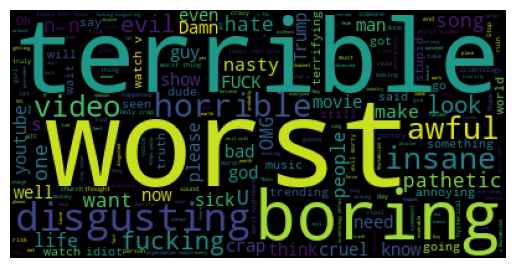

In [169]:
wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(y)
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('Negative_word.png')

In [ ]:
# !pip install emoji==2.2.0

In [99]:
# visulazing the most used emojis in comments
import emoji

In [100]:
emoji.__version__

'2.2.0'

In [101]:
emoji_data=[i for i in comment['comment_text'].dropna() if i in emoji.EMOJI_DATA]


In [102]:
from collections import Counter

In [103]:
emoji = [Counter(emoji_data).most_common(10)[i][0] for i in range(10)]

In [104]:
freq =[Counter(emoji_data).most_common(10)[i][1] for i in range(10)]

In [105]:
emoji

['❤️', '❤', '👍', '😍', '😂', '♥', '💖', '💜', '🔥', '🐍']

In [106]:
freq

[164, 148, 120, 120, 90, 43, 38, 28, 28, 23]

In [107]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [175]:
plot = go.Bar(x=emoji,y=freq)
iplot([plot])


# Collecting All the Youtube Datasets from Different directory


In [110]:
import os

In [112]:
files=os.listdir(r'D:\Youtube_Viewers_Sentiments_Analysis\Data\additional_data-20240118T141534Z-001\additional_data')
files

['CAvideos.csv',
 'CA_category_id.json',
 'DEvideos.csv',
 'DE_category_id.json',
 'FRvideos.csv',
 'FR_category_id.json',
 'GBvideos.csv',
 'GB_category_id.json',
 'INvideos.csv',
 'IN_category_id.json',
 'JPvideos.csv',
 'JP_category_id.json',
 'KRvideos.csv',
 'KR_category_id.json',
 'MXvideos.csv',
 'MX_category_id.json',
 'RUvideos.csv',
 'RU_category_id.json',
 'USvideos.csv',
 'US_category_id.json']

In [115]:
files_csv=[file for file in files if '.csv' in file]
files_csv

['CAvideos.csv',
 'DEvideos.csv',
 'FRvideos.csv',
 'GBvideos.csv',
 'INvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'MXvideos.csv',
 'RUvideos.csv',
 'USvideos.csv']

In [121]:
path = r'D:\Youtube_Viewers_Sentiments_Analysis\Data\additional_data-20240118T141534Z-001\additional_data'
full_df = pd.DataFrame()

for files in files_csv:
    current_df=pd.read_csv(path+'/'+files,encoding='iso-8859-1')
    full_df = pd.concat([full_df,current_df],ignore_index=True)
    

In [124]:
full_df.shape

(375942, 16)

In [126]:
full_df[full_df.duplicated()]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
40919,oWQuB2lVQLc,17.14.11,Zvezde Granda - Cela emisija 06 - ZG 2017/18 -...,Zvezde Granda,24,2017-11-12T00:02:41.000Z,"zvezde|""granda""|""hit""|""emisija""|""grand""|""2016""...",496192,1503,443,1020,https://i.ytimg.com/vi/oWQuB2lVQLc/default.jpg,False,False,False,ZvaniÄni portal: http://grand.online/\nFacebo...
40935,JzCsM1vtn78,17.14.11,THE LOGANG MADE HISTORY. LOL. AGAIN.,Logan Paul Vlogs,24,2017-11-12T20:19:24.000Z,"logan paul vlog|""logan paul""|""logan""|""paul""|""o...",4477587,292837,4123,36391,https://i.ytimg.com/vi/JzCsM1vtn78/default.jpg,False,False,False,Join the movement. Be a Maverick âº https://S...
40939,U3xLOo-CNwo,17.14.11,12 Weird Ways To Sneak Food Into Class / Back ...,Troom Troom,26,2017-11-12T15:00:05.000Z,"sneak food|""how to sneak food into class""|""cla...",3153224,28451,2285,3312,https://i.ytimg.com/vi/U3xLOo-CNwo/default.jpg,False,False,False,Subscribe Here: http://bit.ly/2uaz0on\n12 Hot ...
40989,YYOCmR5Lvbw,17.14.11,2017 Brazil Grand Prix: Race Highlights,FORMULA 1,17,2017-11-12T22:05:07.000Z,"F1|""Formula One""|""Formula 1""|""Sports""|""Sport""|...",758492,11936,160,1472,https://i.ytimg.com/vi/YYOCmR5Lvbw/default.jpg,False,False,False,"Lewis Hamilton starts from the back, Valtteri ..."
40991,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375905,UKserM-i0_A,18.14.06,Panic! At The Disco: High Hopes (Audio),Panic! At The Disco,10,2018-05-23T18:00:13.000Z,"Panic At The Disco|""Panic! At The Disco""|""PATD...",7676068,230427,3383,22924,https://i.ytimg.com/vi/UKserM-i0_A/default.jpg,False,False,False,I spent too long not setting my expectations h...
375922,hHaUQh6Gx-Q,18.14.06,"Mustard, Nick Jonas - Anywhere",MustardVEVO,10,2018-05-22T12:00:02.000Z,"Mustard|""Nick""|""Jonas""|""Anywhere""|""10""|""Summer...",2653229,48889,890,1181,https://i.ytimg.com/vi/hHaUQh6Gx-Q/default.jpg,False,False,False,Anywhere Out Now! http://smarturl.it/AnywhereM...
375927,Qcj15vHJTtk,18.14.06,Royal Wedding - SNL,Saturday Night Live,24,2018-05-20T04:58:51.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""SNL...",8607264,66559,14179,8382,https://i.ytimg.com/vi/Qcj15vHJTtk/default.jpg,False,False,False,Footage from Prince Harry's (Mikey Day) weddin...
375932,pcJo0tIWybY,18.14.06,SZA - Garden (Say It Like Dat) (Official Video),SZAVEVO,10,2018-05-18T14:00:04.000Z,"Garden (Say It Like Dat)|""R&B""|""SZA""|""Top Dawg...",6004782,210802,4166,15169,https://i.ytimg.com/vi/pcJo0tIWybY/default.jpg,False,False,False,SZA's CTRL available on:Apple Music - http://s...


In [127]:
full_df.drop_duplicates(inplace=True)

In [129]:
full_df.shape

(339525, 16)

In [132]:
full_df.dropna(inplace=True)

In [133]:
full_df.shape

(321548, 16)

In [134]:
full_df.to_csv(r'D:\Youtube_Viewers_Sentiments_Analysis\Data\youtupe.csv',index=False)

In [136]:
full_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...


In [139]:
full_df['category_id'].unique()

array([10, 23, 24, 25, 22, 26,  1, 28, 20, 17, 29, 15, 19,  2, 27, 43, 30,
       44], dtype=int64)

In [140]:
json_df = pd.read_json(r'D:/Youtube_Viewers_Sentiments_Analysis/Data/additional_data-20240118T141534Z-001/additional_data/CA_category_id.json')
json_df

,kind,etag,items
0,youtube#videoCategoryListResponse,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""ld..."
1,youtube#videoCategoryListResponse,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""ld..."
2,youtube#videoCategoryListResponse,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""ld..."
3,youtube#videoCategoryListResponse,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""ld..."
4,youtube#videoCategoryListResponse,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""ld..."
5,youtube#videoCategoryListResponse,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""ld..."
6,youtube#videoCategoryListResponse,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""ld..."
7,youtube#videoCategoryListResponse,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""ld..."
8,youtube#videoCategoryListResponse,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""ld..."
9,youtube#videoCategoryListResponse,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""ld..."


In [142]:
json_df['items'][0]

{'kind': 'youtube#videoCategory',
 'etag': '"ld9biNPKjAjgjV7EZ4EKeEGrhao/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
 'id': '1',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Film & Animation',
  'assignable': True}}

In [153]:
cat_dic = {}

for item in json_df['items'].values:
    cat_dic[int(item['id'])]=item['snippet']['title']
    
    
cat_dic

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [154]:
full_df['category_name']=full_df['category_id'].map(cat_dic)

In [158]:
full_df['category_name'].value_counts()

category_name
Entertainment           94001
People & Blogs          43312
Music                   36361
News & Politics         31955
Comedy                  23439
Sports                  20083
Howto & Style           17351
Film & Animation        17280
Gaming                  10074
Science & Technology     7208
Education                7144
Autos & Vehicles         4455
Pets & Animals           4130
Travel & Events          1575
Shows                     726
Movies                     22
Trailers                    5
Name: count, dtype: int64

In [159]:
import seaborn as sns

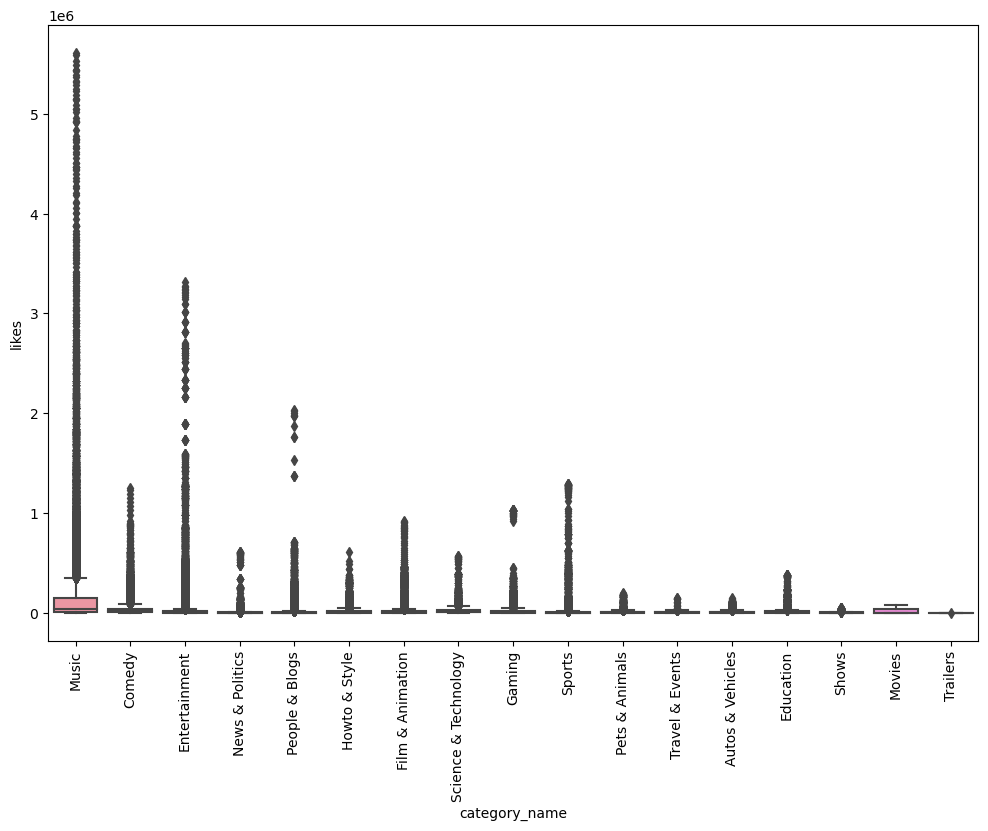

In [171]:
plt.figure(figsize=(12,8))
sns.boxplot(data=full_df,x='category_name',y='likes')
plt.xticks(rotation=90)
plt.savefig('Category_with_Likes.png')